# Physics 5300 Gravitational Orbits

<big><big>

Mark Fugate <br>
Prof. Furnstahl <br>
26 April 2019 <br>

</big>

We will implement the equations of motion for the two body problem in cartesian coordinates by solving Lagrange's equations


<br>

</big>

<big> 
    Consider two bodies hanging out in 2-D space, subject only to the potential field of their mutual gravitational attraction. How can we solve their motion? <br>
    First, let's assume the gravitational field is like the one seen in real life, with the following form:
    $\begin{align}
        U(r) = - k m_1 m_2 \Delta r^{-1}
     \end{align}$
Where k is a constant, m_1 and m_2 are the masses, and $\Delta r$ is their separation. Let's write down T and U for each, so we can find their lagrangians.

$ \begin{align}
    T_i = \frac{1}{2} m_i \dot{r_i}^2 = \frac{1}{2} m_i ( \dot{x_i}^2 + \dot{y_i}^2)
    \end{align}$ <br>
    $\begin{align}
    U_i = U_j = - k m_i m_j \Delta r^{-1} = - k m_i m_j ( (x_i - x_j)^2 + (y_i - y_j)^2 )^{(-1/2)}
    \end{align}$ <br>
    $\begin{align}
    \mathcal{L_i} = \frac{1}{2} m_i ( \dot{x_i}^2 + \dot{y_i}^2) +  k m_i m_j ( (x_i - x_j)^2 + (y_i - y_j)^2 )^{(-1/2)}
    \end{align}$

<big>
    Above, i represents one mass, and j the other. Notice, T will depend on which mass you're dealing with, while U will be the same for both. Now let's solve lagrange's equations and get expressions for $\ddot{x_i}$ and $\ddot{y_i}$, which is of course four equations since there are two masses. First let's consider the x equation for a mass i:

$\begin{align}
\frac{\partial\mathcal{L}}{\partial x_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot{x_1}}
\end{align}$ <br>

$\begin{align}
\ddot{x_1} = \frac{k}{m_2} (x_1 - x_2) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

<big> No need to solve the other three - by inspection I know they'll be the same, just with some indices switched up:

$\begin{align}
\ddot{x_2} = \frac{k}{m_1} (x_2 - x_1) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

$\begin{align}
\ddot{y_1} = \frac{k}{m_2} (y_1 - y_2) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

$\begin{align}
\ddot{y_2} = \frac{k}{m_1} (y_2 - y_1) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

In [1]:
#start by importing all the packages we will need

%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [2]:
class orbit:
    """
    Solves the two body problem in cartesian space. Assumes potential of
    the form U = - k m_1 m_2 r ^ -1
    
    Parameters
    ----------
    m1 and m2 : float
        masses of the "planets".
    k : float
        analagous to the gravitational constant.
            

    Methods
    -------
    da_dt(a, t)
        Returns the right side of the differential equation in vector a, 
        given time t and the corresponding value of a.
    solve_ode(t_pts, a)
        Solves the diff eq for the initial conditions you give it in the 8-component vector 
        a, and over the time pts in t_pts
    """
    
    def __init__(self, m_1, m_2, k):
        self.m_1 = m_1
        self.m_2 = m_2
        self.k = k
        
    def dy_dt(self, a, t_pts):
        
        rel = ((a[0]-a[1])**2 + (a[2]-a[3])**2)**0.5
        
        
        ddotx1 = (self.k / self.m_2)*(a[0]-a[1])*(rel**-3) 
        ddotx2 = (self.k / self.m_1)*(a[1]-a[0])*(rel**-3) 
        ddoty1 = (self.k / self.m_2)*(a[2]-a[3])*(rel**-3) 
        ddoty2 = (self.k / self.m_1)*(a[3]-a[2])*(rel**-3) 
        
        return [a[4], a[5], a[6], a[7], ddotx1, ddotx2, ddoty1, ddoty2]
        

    def solve_ode(self, t_pts, a, abserr=1.0e-8, relerr=1.0e-8):
        
        q = odeint(self.dy_dt, a, t_pts, atol=abserr, rtol=relerr).T
        
        return q

<big> Let's give it a shot and see if the results make sense. 

<IPython.core.display.Javascript object>


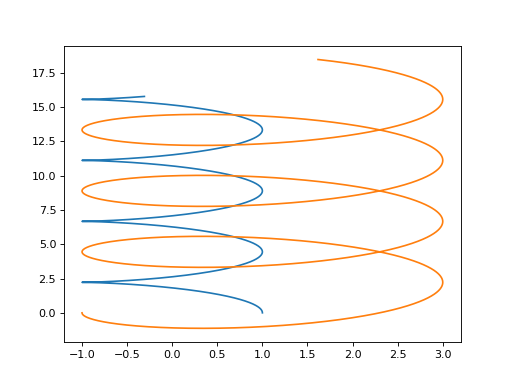

In [23]:
test = orbit(m_1 = 1.0, m_2 = 2.0, k = -4.0)

t_pts = np.arange(0, 50.0, 0.01)

x1_0 = 1.0
x2_0 = -1.0
y1_0 = 0.0
y2_0 = 0.0

xdot1_0 = 0.0
xdot2_0 = 0.0
ydot1_0 = 1.0
ydot2_0 = -1.0


a = [x1_0, x2_0, y1_0, y2_0, xdot1_0, xdot2_0, ydot1_0, ydot2_0]

q = test.solve_ode(t_pts, a)

fig = plt.figure()

plt.plot(q[0],q[2])
plt.plot(q[1],q[3])

<big> Look's like an orbit to me! Notice, we aren't in the CM frame, so both masses move through space due to the nonzero total momentum, resulting in the strange helical shape we see. A good test of whether or not this result is truly physical is to make one mass much larger than the other, and see if the orbit looks Kepler-ian in the rest frame of the large mass. 

<IPython.core.display.Javascript object>


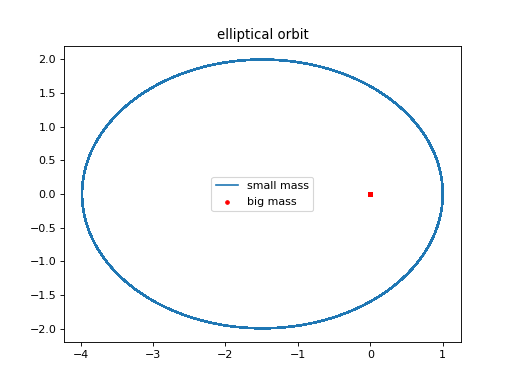

Text(0.5, 1.0, 'elliptical orbit')

In [65]:
kepler = orbit(m_1 = 10.0, m_2 = 10000.0, k = -100.0)

t_pts = np.arange(0, 5000.0, 0.01)

bx1_0 = 1.0
bx2_0 = 0.0
by1_0 = 0.0
by2_0 = 0.0

bxdot1_0 = 0.0
bxdot2_0 = 0.0
bydot1_0 = 4.0
bydot2_0 = 0.0


ba = [bx1_0, bx2_0, by1_0, by2_0, bxdot1_0, bxdot2_0, bydot1_0, bydot2_0]

bq = kepler.solve_ode(t_pts, ba)

kepler_fig = plt.figure()

ax1 = kepler_fig.add_subplot(1,1,1)

#my maneuver to get the rest frame of m_2 is to simply subtract m_2's coordinates
ax1.plot(bq[0] - bq[1] ,bq[2] - bq[3], label = 'small mass') 
ax1.scatter(bq[1] - bq[1], bq[3] - bq[3] , s=10, color='red', label = 'big mass')
ax1.legend()
ax1.set_title("elliptical orbit")

